#  NOAA (National Oceanic and Atmospheric Administration) 
## Data exploration  
-----------------------------


### Background

NOAA’s National Centers for Environmental Information (NCEI) hosts and provides access to one of the most significant archives on earth, with comprehensive oceanic, atmospheric, and geophysical data. From the depths of the ocean to the surface of the sun and from million-year-old ice core records to near-real-time satellite images, NCEI is the Nation’s leading authority for environmental information.

The five "fundamental activities" of NOAA are:

- Monitoring and observing Earth systems with instruments and data collection networks.
- Understanding and describing Earth systems through research and analysis of that data.
- Assessing and predicting the changes of these systems over time.
- Engaging, advising, and informing the public and partner organizations with important information.
- Managing resources for the betterment of society, economy and environment.

Details of NOAA - https://en.wikipedia.org/wiki/National_Oceanic_and_Atmospheric_Administration

#### Sample weather station for land based observations

<img src="./aws-data/crn-instruments.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 5px;" />   
       



### Data definition and collection

#### GHCN 
- The Global Historical Climatology Network (GHCN) is an integrated database of climate summaries from land surface stations across the globe. 
- GHCN-Daily contains records from over 100,000 stations in 180 countries and territories.
- The data are obtained from more than 20 sources. Some data are more than 175 years old.
- NCEI provides numerous daily variables, including maximum and minimum temperature, total daily precipitation, snowfall, and snow depth; however, about one half of the stations 
  report precipitation only
  
##### Data description
https://www.ncdc.noaa.gov/ghcn-daily-description

##### Collection
The data can be collected from S3 buckets. Here I collected it beforehand and put into aws-data folder for 2019.  
For detail information the link is as below:  
https://docs.opendata.aws/noaa-ghcn-pds/readme.html  
Question for data quality should be addressed at noaa.bdp@noaa.gov.

### Exploration of data retreived from station
#### Summary of Date format
ID = 11 character station identification code. Please see ghcnd-stations section below for an explantation  
YEAR/MONTH/DAY = 8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)  
ELEMENT = 4 character indicator of element type  
DATA VALUE = 5 character data value for ELEMENT  
M-FLAG = 1 character Measurement Flag  
Q-FLAG = 1 character Quality Flag  
S-FLAG = 1 character Source Flag  
OBS-TIME = 4-character time of observation in hour-minute format (i.e. 0700 =7:00 am)  

The fields are comma delimited and each row represents one station-day.  

In [43]:
import pandas as pd
station_df = pd.read_csv("./aws-data/2019.csv", header = None, \
                 names = ['station_code', 'w_date', 'element_type', 'element_value', 'measurement_flag', 'quality_flag', \
                          'source_flag', 'obs_time'], \
                delimiter = ',')

### Retreive unique element_types

The five core elements are:  
PRCP = Precipitation (tenths of mm)  
SNOW = Snowfall (mm)  
SNWD = Snow depth (mm)  
TMAX = Maximum temperature (tenths of degrees C)  
TMIN = Minimum temperature (tenths of degrees C)  

In [44]:
station_df.head()

,station_code,w_date,element_type,element_value,measurement_flag,quality_flag,source_flag,obs_time
0,CA1MB000296,20190101,PRCP,0,NaN,NaN,N,NaN
1,US1ILMG0006,20190101,PRCP,587,NaN,NaN,N,NaN
2,ASN00015643,20190101,TMAX,436,NaN,NaN,a,NaN
3,ASN00015643,20190101,TMIN,263,NaN,NaN,a,NaN
4,ASN00015643,20190101,PRCP,0,NaN,NaN,a,NaN


In [45]:
station_df['element_type'].unique()

array(['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD', 'DATX', 'MDTX', 'WESD',
       'WESF', 'TAVG', 'WDFG', 'WSFG', 'AWND', 'PGTM', 'WDF2', 'WDF5',
       'WSF2', 'WSF5', 'WT01', 'WT02', 'WT08', 'TOBS', 'SN52', 'SX52',
       'SN32', 'SX32', 'WT11', 'WDMV', 'EVAP', 'SN53', 'SN55', 'SX53',
       'SX55', 'WT04', 'SN31', 'SN33', 'SX31', 'SX33', 'WT06', 'MNPN',
       'MXPN', 'DAPR', 'MDPR', 'AWDR', 'WSFI', 'DATN', 'MDTN', 'SN51',
       'SX51', 'WT03', 'WT05', 'SN35', 'SX35', 'SN36', 'SX36', 'SN56',
       'SX56', 'PSUN', 'TSUN', 'WT09', 'DWPR', 'THIC', 'DASF', 'MDSF',
       'WT07', 'WT10'], dtype=object)

### Check for distinct dates in descending order

1. This will provide dates and frequency of update is daily - to confirm  

In [46]:
station_df.sort_values(['w_date'], ascending = [False]).head(10)

,station_code,w_date,element_type,element_value,measurement_flag,quality_flag,source_flag,obs_time
11077207,US1KSDG0010,20190511,WESF,0,NaN,NaN,N,NaN
11060321,USC00480951,20190511,SNOW,0,NaN,NaN,H,NaN
11060323,US1FLJF0003,20190511,PRCP,0,NaN,NaN,N,NaN
11060324,US1FLJF0003,20190511,SNOW,0,NaN,NaN,N,NaN
11060325,USC00409709,20190511,TMAX,206,NaN,NaN,H,800.0
11060326,USC00409709,20190511,TMIN,133,NaN,NaN,H,800.0
11060327,USC00409709,20190511,TOBS,139,NaN,NaN,H,800.0
11060328,USC00409709,20190511,PRCP,15,NaN,NaN,H,800.0
11060329,USC00409709,20190511,SNOW,0,NaN,NaN,H,NaN
11060330,USC00409709,20190511,SNWD,0,NaN,NaN,H,NaN


### Check for number of observations per day

In [47]:
df_grp_dt = station_df.groupby(['w_date'], as_index = False).count().sort_values(['w_date'], ascending = False)
df_grp_dt.head()

,w_date,station_code,element_type,element_value,measurement_flag,quality_flag,source_flag,obs_time
130,20190511,25318,25318,25318,3187,8,25318,7779
129,20190510,58946,58946,58946,7428,32,58946,13483
128,20190509,67079,67079,67079,7277,37,67079,15395
127,20190508,67312,67312,67312,7129,17,67312,15721
126,20190507,68060,68060,68060,7299,21,68060,15706


### Check for M-flag i.e. measurement flag  
MFLAG is the measurement flag. There are ten possible values:  
Blank = no measurement information applicable  
B = precipitation total formed from two 12-hour totals  
D = precipitation total formed from four six-hour totals  
H = represents highest or lowest hourly temperature (TMAX or TMIN) or the average of hourly values (TAVG)  
K = converted from knots  
L = temperature appears to be lagged with respect to reported hour of observation  
O = converted from oktas  
P = identified as “missing presumed zero” in DSI 3200 and 3206  
T = trace of precipitation, snowfall, or snow depth  
W = converted from 16-point WBAN code (for wind direction)  

In [48]:
station_df['measurement_flag'].unique()

array([nan, 'T', 'H', 'B', 'D'], dtype=object)

### Check for Q-flag i.e. quality flag  
Q-FLAG is the measurement quality flag. here are fourteen possible values:  
Blank = did not fail any quality assurance check  
D = failed duplicate check  
G = failed gap check  
I = failed internal consistency check  
K = failed streak/frequent-value check  
L = failed check on length of multiday period  
M = failed mega consistency check  
N = failed naught check  
O = failed climatological outlier check  
R = failed lagged range check  
S = failed spatial consistency check  
T = failed temporal consistency check  
W = temperature too warm for snow  
X = failed bounds check  
Z = flagged as a result of an official Datzilla Investigation  

In [49]:
station_df['quality_flag'].unique().tolist()

[nan, 'I', 'S', 'K', 'O', 'G', 'X', 'Z', 'D', 'L', 'N', 'T', 'M', 'W']

### Check for S-flag i.e. source flag

S-FLAG is the source flag for the observation. There are twenty nine possible values (including blank, upper and lower case letters):

Blank = No source (i.e., data value missing)  
0 = U.S. Cooperative Summary of the Day (NCDC DSI-3200)  
6 = CDMP Cooperative Summary of the Day (NCDC DSI-3206)  
7 = U.S. Cooperative Summary of the Day – Transmitted via WxCoder3 (NCDC SI-3207)  
A = U.S. Automated Surface Observing System (ASOS) real-time data (since January 1, 2006)  
a = Australian data from the Australian Bureau of Meteorology  
B = U.S. ASOS data for October 2000-December 2005 (NCDC DSI-3211)  
b = Belarus update  
C = Environment Canada  
E = European Climate Assessment and Dataset (Klein Tank et al., 2002)  
F = U.S. Fort data  
G = Official Global Climate Observing System (GCOS) or other government-supplied data  
H = High Plains Regional Climate Center real-time data  
I = International collection (non U.S. data received through personal contacts)  
K = U.S. Cooperative Summary of the Day data digitized from paper observer forms (from 2011 to present)  
M = Monthly METAR Extract (additional ASOS data)  
N = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)  
Q = Data from several African countries that had been “quarantined”, that is, withheld from public release until permission was granted from the respective meteorological services  
R = NCEI Reference Network Database (Climate Reference Network and Regional Climate Reference Network)  
r = All-Russian Research Institute of Hydro-meteorological Information-World Data Center  
S = Global Summary of the Day (NCDC DSI-9618)NOTE: “S” values are derived from hourly synoptic reports exchanged on the Global    Telecommunications System (GTS). Daily values derived in this fashion may differ significantly from “true” daily data, particularly for precipitation (i.e., use with caution).  
s = China Meteorological Administration/National Meteorological Information Center/Climatic Data Center (http://cdc.cma.gov.cn)  
T = SNOwpack TELemtry (SNOTEL) data obtained from the U.S. Department of Agriculture’s Natural Resources Conservation Service  
U = Remote Automatic Weather Station (RAWS) data obtained from the Western Regional Climate Center  
u = Ukraine update  
W = WBAN/ASOS Summary of the Day from NCDC’s Integrated Surface Data (ISD).  
X = U.S. First-Order Summary of the Day (NCDC DSI-3210)  
Z = Datzilla official additions or replacements  
z = Uzbekistan update  
When data are available for the same time from more than one source, the highest priority source is chosen according to the following priority order (from highest to lowest): - Z,R,0,6,C,X,W,K,7,F,B,M,r,E,z,u,b,s,a,G,Q,I,A,N,T,U,H,S  



In [50]:
station_df['source_flag'].astype('str').unique().tolist()

['N', 'a', 'C', 'S', 'W', 'R', 'T', 'U', '7', 'E', 'H', 'Z', 'D']

---

## Exploration of Station meta data

### Variable and feature details

These variables have the following definitions:  

- ID = the station identification code.  
    The first two characters denote the FIPS country code. Details for FIPS country code https://www.geodatasource.com/resources/tutorials/international-country-code-fips-versus-iso-3166/     
    The third character is a network code that identifies the station numbering system used  
    0 = unspecified (station identified by up to eight alphanumeric characters)  
    1 = Community Collaborative Rain, Hail,and Snow (CoCoRaHS) based identification number. To ensure consistency with with GHCN 
    Daily, all numbers in the original CoCoRaHS IDs have been left-filled to make them all four digits long. In addition, the 
    characters “-” and “_” have been removed to ensure that the IDs do not exceed 11 characters when preceded by “US1”. For 
    example, the CoCoRaHS ID “AZ-MR-156” becomes “US1AZMR0156” in GHCN-Daily  
- C = U.S. Cooperative Network identification number (last six characters of the GHCN-Daily ID)  
- E = Identification number used in the ECA&D non-blended dataset  
- M = World Meteorological Organization ID (last five characters of the GHCN-Daily ID)  
- N = Identification number used in data supplied by a National Meteorological or Hydrological Center  
- R = U.S. Interagency Remote Automatic Weather Station (RAWS) identifier  
- S = U.S. Natural Resources Conservation Service SNOwpack TELemtry (SNOTEL) station identifier  
- W = WBAN identification number (last five characters of the GHCN-Daily ID)  
- The remaining eight characters contain the actual station ID.  
- LATITUDE = latitude of the station (in decimal degrees).  
- LONGITUDE = longitude of the station (in decimal degrees).  
- STATE = U.S. postal code for the state (for U.S. and Canadian stations only).  
- NAME = name of the station.  
- GSN FLAG = flag that indicates whether the station is part of the GCOS Surface Network (GSN). The flag is assigned by cross-
    referencing the number in the WMOID field with the official list of GSN stations. There are two possible values:  
- Blank = non-GSN station or WMO Station number not available  
- GSN = GSN station  
- HCN/CRN FLAG = flag that indicates whether the station is part of the U.S. Historical Climatology Network (HCN). There are three 
    possible values:  

- Blank = Not a member of the U.S. Historical Climatology or U.S. Climate Reference Networks  
- HCN = U.S. Historical Climatology Network station  
- CRN = U.S. Climate Reference Network or U.S. Regional Climate Network Station  
- WMO ID is the World Meteorological Organization (WMO) number for the station. If the station has no WMO number (or one has not  
    yet been matched to this station), then the field is blank.



In [51]:
import pandas as pd
md_station_df = pd.read_csv("./aws-data/ghcnd-stations.txt", header = None, sep = '\s+', \
                         names = ['station_id', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn_flag', \
                                  'hcn_flag', 'wmo_id'])


### The table below describes the structure of each row  

Variable ColumnsType Example  
- ID 1-11 Character	EI000003980
- LATITUDE 13-20 Real 55.3717
- LONGITUDE 22-30 Real -7.3400
- ELEVATION 32-37 Real 21.0
- STATE 39-40 Character
- NAME 42-71 Character MALIN HEAD
- GSN FLAG 73-75 Character GSN
- HCN/CRN FLAG 77-79 Character
- WMO ID 81-85 Character 03980

In [52]:
md_station_df.head(10)

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH,INTER.,AIRP,GSN,41196
3,AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217,NaN
5,AEM00041218,24.2620,55.6090,264.9,AL,AIN,INTL,41218,NaN
6,AF000040930,35.3170,69.0170,3366.0,NORTH-SALANG,GSN,40930,NaN,NaN
7,AFM00040938,34.2100,62.2280,977.2,HERAT,40938,NaN,NaN,NaN
8,AFM00040948,34.5660,69.2120,1791.3,KABUL,INTL,40948,NaN,NaN
9,AFM00040990,31.5000,65.8500,1010.0,KANDAHAR,AIRPORT,40990,NaN,NaN


In [53]:
import folium
latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
mapit = folium.Map( location=[52.667989, -1.464582], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit



md_city_cordinates = md_station_df[md_station_df.state.str.contains("BOMBAY", na=False)][['state','latitude', 'longitude']]
md_city_cordinates

berlin_location = [md_city_cordinates.iloc[0].latitude, md_city_cordinates.iloc[0].longitude]

#tiles="https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s"

m = folium.Map(location=berlin_location, zoom_start=11, tiles="openstreetmap", attr="HERE.com")

# mark each station as a point
for index, row in md_city_cordinates.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['state'],
                        fill_color="blue", # divvy color
                        con_color='white',
                       ).add_to(m)

    

m

In [54]:
md_station_df.head()

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH,INTER.,AIRP,GSN,41196
3,AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217,NaN


### Projection for city e.g. Berlin

In [56]:
import folium
from folium import features


md_city_cordinates = md_station_df[md_station_df.state.str.contains("ERLANGEN", na=False)][['state','latitude', 'longitude']]
md_city_cordinates

berlin_location = [md_city_cordinates.iloc[0].latitude, md_city_cordinates.iloc[0].longitude]

#tiles="https://1.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day/{z}/{x}/{y}/256/png8?lg=eng&app_id=%s&app_code=%s"

m = folium.Map(location=berlin_location, zoom_start=11, tiles="openstreetmap", attr="HERE.com")

# mark each station as a point
for index, row in md_city_cordinates.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['state'],
                        fill_color="blue", # divvy color
                        con_color='white',
                       ).add_to(m)

    

m

    

#### Check the location where we have maximum temperature

In [57]:
md_city_cordinates = md_station_df[md_station_df.state.str.contains("BERLIN", na=False)]
md_city_cordinates.head()

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wmo_id
34336,GM000003319,52.4639,13.3017,51.0,BERLIN-DAHLEM,10381,NaN,NaN,NaN
34379,GME00111445,52.4683,13.4039,48.0,BERLIN-TEMPELHOF,10384,NaN,NaN,NaN
34406,GME00121150,52.5656,13.3106,36.0,BERLIN-TEGEL,10382,NaN,NaN,NaN
34894,GME00127438,52.6325,13.5039,60.0,BERLIN-BUCH,NaN,NaN,NaN,NaN
34898,GME00127486,52.4578,13.3014,55.0,BERLIN-DAHLEM,(LFAG),NaN,NaN,NaN


#### Check station details for a city

In [58]:
md_station_df[(md_station_df.station_id.str.startswith('GM')) & (md_station_df.state.str.startswith('BERLIN'))]

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wmo_id
34336,GM000003319,52.4639,13.3017,51.0,BERLIN-DAHLEM,10381,NaN,NaN,NaN
34379,GME00111445,52.4683,13.4039,48.0,BERLIN-TEMPELHOF,10384,NaN,NaN,NaN
34406,GME00121150,52.5656,13.3106,36.0,BERLIN-TEGEL,10382,NaN,NaN,NaN
34894,GME00127438,52.6325,13.5039,60.0,BERLIN-BUCH,NaN,NaN,NaN,NaN
34898,GME00127486,52.4578,13.3014,55.0,BERLIN-DAHLEM,(LFAG),NaN,NaN,NaN
34911,GME00127642,52.4056,13.7328,33.0,BERLIN-KANISWALL,NaN,NaN,NaN,NaN
34920,GME00127762,52.4081,13.4142,47.0,BERLIN-LICHTENRADE,NaN,NaN,NaN,NaN
34923,GME00127798,52.4156,13.3053,43.0,BERLIN-LICHTERFELDE,(SUD),NaN,NaN,NaN
34925,GME00127822,52.5458,13.5617,60.0,BERLIN-MARZAHN,NaN,NaN,NaN,NaN
34927,GME00127850,52.5331,13.3831,35.0,BERLIN-MITTE,NaN,NaN,NaN,NaN


In [65]:
berlin_station_id = md_station_df[(md_station_df.station_id.str.startswith('GM')) & (md_station_df.state.str.startswith('BERLIN')) | \
                                  (md_station_df.state.str.startswith('HAMBURG')) | \
                                  (md_station_df.state.str.startswith('TOKYO'))].station_id.unique().tolist()
berlin_station_id[:5]

['GM000003319', 'GM000003865', 'GM000010147', 'GME00111445', 'GME00121150']

### Here we can see Berlin, Hamburg, Tokyo has many stations however only of them strores the average temperature

In [66]:
berlin_station_data =  station_df[station_df.station_code.isin(berlin_station_id)]
berlin_station_data.station_code.unique()

array(['GME00127438', 'GME00127930', 'GME00127642', 'GME00123274',
       'GM000010147', 'JA000047662', 'GM000003319', 'GME00127822',
       'GME00111445', 'GME00121150'], dtype=object)

In [67]:
berlin_data_plot = berlin_station_data[berlin_station_data.element_type.str.contains("TAVG")][['station_code', 'w_date', 'element_type']]
berlin_data_plot['element_type_celcius'] = berlin_station_data.element_value/10
berlin_data_plot.station_code.unique().tolist()

['GM000010147', 'JA000047662', 'GME00121150']

In [68]:
import matplotlib.pyplot as plt

berlin_data_plot = berlin_station_data[berlin_station_data.element_type.str.contains("TAVG")][['station_code', 'w_date', 'element_type']]
berlin_data_plot['element_type_celcius'] = berlin_station_data.element_value/10
berlin_data_pyplot = berlin_data_plot
berlin_data_pyplot.w_date = pd.to_datetime(berlin_data_pyplot['w_date'], format='%Y%m%d')
berlin_data_pyplot.set_index(['w_date'],inplace=True)
berlin_data_pyplot.plot()


In [69]:
import seaborn as sns

berlin_data_plot = berlin_station_data[berlin_station_data.element_type.str.contains("TAVG")][['station_code', 'w_date', 'element_type']]
berlin_data_plot['element_type_celcius'] = berlin_station_data.element_value/10
berlin_data_seaplot = berlin_data_plot
berlin_data_seaplot.w_date = pd.to_datetime(berlin_data_seaplot['w_date'], format='%Y%m%d')
berlin_data_seaplot.head()

,station_code,w_date,element_type,element_type_celcius
49599,GM000010147,2019-01-01,TAVG,6.6
57458,JA000047662,2019-01-01,TAVG,5.9
76056,GME00121150,2019-01-01,TAVG,6.6
142870,GM000010147,2019-01-02,TAVG,2.9
150821,JA000047662,2019-01-02,TAVG,5.6


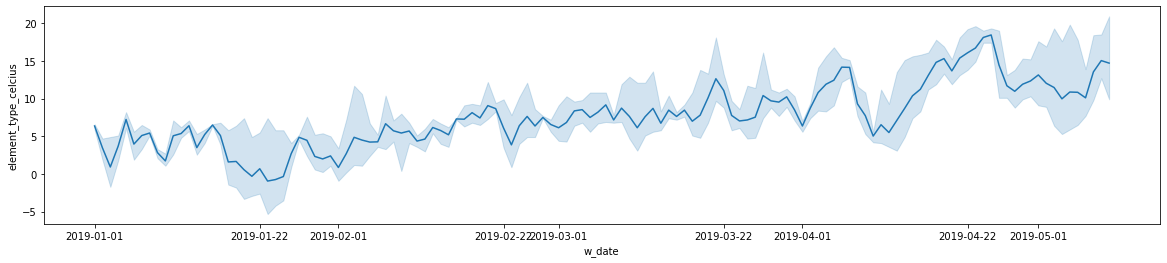

In [70]:
plt.figure(figsize = (20,4))
sns.lineplot(berlin_data_seaplot["w_date"],berlin_data_seaplot["element_type_celcius"])
plt.show()

----

### Exploration of Country code

The state codes are used in the station identification number. In the table below CODE is the FIPS country code of the country where the station is located.

In [71]:
import pandas as pd
from io import StringIO

file = "./aws-data/ghcnd-countries.txt"

def parse_country_file(filename):
    with open(filename) as f:
        for line in f:
            yield line.strip().split(' ', 1)

country_df = pd.DataFrame(parse_country_file(file))
country_df.columns=['country_code', 'country_name']
country_df.head()


,country_code,country_name
0,AC,Antigua and Barbuda
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AG,Algeria
4,AJ,Azerbaijan


# Exploration of State code 

The state codes are used in the station identification number, the table below CODE = is the POSTAL code of the U.S. state/territory or Canadian province where the station is located.

In [72]:
import pandas as pd
from io import StringIO

file = "./aws-data/ghcnd-states.txt"

def parse_country_file(filename):
    with open(filename) as f:
        for line in f:
            yield line.strip().split(' ', 1)

state_df = pd.DataFrame(parse_country_file(file))
state_df.head(10)

,0,1
0,AB,ALBERTA
1,AK,ALASKA
2,AL,ALABAMA
3,AR,ARKANSAS
4,AS,AMERICAN SAMOA
5,AZ,ARIZONA
6,BC,BRITISH COLUMBIA
7,CA,CALIFORNIA
8,CO,COLORADO
9,CT,CONNECTICUT


# GHCND inventory exploration

This is the periods of record for each station and element  

### Data structure

- ID = the station identification code. Please see “ghcnd-stations.txt” for a complete list of stations and their metadata.  
- LATITUDE = the latitude of the station (in decimal degrees).  
- LONGITUDE = the longitude of the station (in decimal degrees).  
- ELEMENT = the element type. See section III for a definition of elements.  
- FIRSTYEAR = the first year of unflagged data for the given element.  
- LASTYEAR = the last year of unflagged data for the given element.  

In [74]:
file = "./aws-data/ghcnd-inventory.txt"
ghcnd_inventory_df = pd.read_csv(file, sep = '\s+', header=None, names = ['staion_id','latitude', 'longitude', 'element', 'firstyear', 'lastyear'])
ghcnd_inventory_df.head(2)

,staion_id,latitude,longitude,element,firstyear,lastyear
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949


### Merging station tracsaction with master data

In [75]:
station_tran_ms_df = pd.merge(station_df, md_station_df, left_on = ['station_code'], right_on = ['station_id'], \
                                how='left')

#### § Find maximum temperature

In [76]:
station_tran_ms_tavg_df = station_tran_ms_df[station_tran_ms_df.element_type.str.contains("TMAX")]
station_tran_ms_tavg_max_df = station_tran_ms_df.loc[station_tran_ms_tavg_df['element_value'].idxmax()]
station_tran_ms_tavg_max_df

station_code        USR0000TCOK
w_date                 20190102
element_type               TMAX
element_value              1117
measurement_flag              H
quality_flag                  X
source_flag                   U
obs_time                    NaN
station_id          USR0000TCOK
latitude                  36.28
longitude               -84.275
elevation                 518.2
state                        TN
name                      COKER
gsn_flag                  CREEK
hcn_flag              TENNESSEE
wmo_id                      NaN
Name: 137246, dtype: object

In [18]:
station_tran_ms_tavg_df.count()

station_code        1415344
w_date              1415344
element_type        1415344
element_value       1415344
measurement_flag     158904
quality_flag           2229
source_flag         1415344
obs_time             556713
station_id          1415344
latitude            1415344
longitude           1415344
elevation           1415344
state               1415344
name                1362873
gsn_flag            1024289
hcn_flag             586694
wmo_id               218815
country_code        1415344
dtype: int64

In [25]:
import folium

station_tran_ms_tavg_max_df_location = [station_tran_ms_tavg_max_df.latitude, station_tran_ms_tavg_max_df.longitude]

m = folium.Map(location=station_tran_ms_tavg_max_df_location, zoom_start=2, tiles="openstreetmap", attr="HERE.com")  

# mark each station as a point
for index, row in md_country_cordinates.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['state'],
                        fill_color="blue", # divvy color
                        con_color='white',
                       ).add_to(m)
    
m

NameError: name 'md_country_cordinates' is not defined

In [26]:
md_station_df['country_code']=md_station_df['station_id'].str[:2]
md_station_df.head(10)
country_df.head()

,country_code,country_name
0,AC,Antigua and Barbuda
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AG,Algeria
4,AJ,Azerbaijan


In [28]:
import pandas as pd
md_station_country = pd.merge(md_station_df, country_df, left_on = ['country_code'], right_on = ['country_code',], \
                                how='left')
md_station_country.head()

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wmo_id,country_code,country_name
0,ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD,NaN,AC,Antigua and Barbuda
1,ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN,NaN,AC,Antigua and Barbuda
2,AE000041196,25.3330,55.5170,34.0,SHARJAH,INTER.,AIRP,GSN,41196,AE,United Arab Emirates
3,AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN,NaN,AE,United Arab Emirates
4,AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217,NaN,AE,United Arab Emirates


In [30]:
import folium


md_country_cordinates = md_station_country[md_station_country.country_name == 'Germany'][['state','latitude', 'longitude']]

country_location = [md_country_cordinates.iloc[0].latitude, md_country_cordinates.iloc[0].longitude]

m = folium.Map(location=country_location, zoom_start=5, tiles="openstreetmap", attr="HERE.com")

# mark each station as a point
for index, row in md_country_cordinates.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        popup=row['state'],
                        fill_color="blue", # divvy color
                        con_color='white',
                       ).add_to(m)

    
m




In [4]:
station_df[station_df.element_type.str.contains("WT")].head()

,station_code,w_date,element_type,element_value,measurement_flag,quality_flag,source_flag,obs_time
120,USW00024229,20190101,WT01,1,NaN,NaN,W,NaN
121,USW00024229,20190101,WT02,1,NaN,NaN,W,NaN
144,USW00012876,20190101,WT01,1,NaN,NaN,W,NaN
145,USW00012876,20190101,WT02,1,NaN,NaN,W,NaN
166,USW00012842,20190101,WT01,1,NaN,NaN,W,NaN
